In [4]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [5]:
def rho_green_light(nx, rho_light):
    """Computes "green light" initial condition with shock, and linear distribution behind
    
    Parameters
    ----------
    nx    : int
        Number of grid points in x
    rho_light : float
        Density of cars at stoplight
    
    Returns
    ----------
    rho: array of floats
        Array with initial values of density
    """
    
    rho = numpy.arange(nx)*2./nx*rho_light #Before stoplight
    rho[(nx-1)/2:]=0
    
    return rho

In [6]:
#Basic initial condition parameters
#defining grid size, time steps
nx = 81
nt = 30
dx = 4.0/(nx-1)


x = numpy.linspace(0,4,nx)

rho_max = 10.
u_max = 1.
rho_light = 10.

rho = rho_green_light(nx, rho_light)

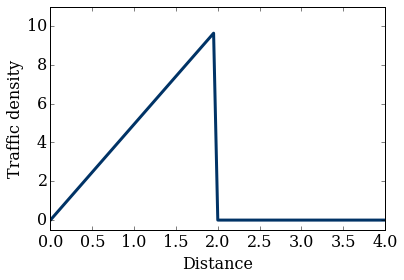

In [7]:
pyplot.plot(x, rho, color = '#003366', ls = '-', lw =3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11);

In [8]:
def computeF(u_max, rho_max, rho):
    """Computes flux F = V*rho
    
    Parameters
    ----------
    u_max : float
        Maximum allowed velocity
    rho : array of floats
        Array with density of cars at every point x
    rho_max: float
        Maximum allowed car density
    
    Returns
    ----------
    F : array
        Array with flux at every point x
    """
    
    return u_max*rho*(1-rho/rho_max)

In [10]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """Computes the solution with forward in time, backwards in space
    
    Parameters
    ----------
    rho : array of floats
        Density at current time-step
    nt : int
        Number of time steps
    dt : float
        Time-step size
    dx : float
        Mesh spacing
    rho_max : float
        Maximum allowed car density
    u_max : float 
        Speed limit
    
    Returns
    ----------
    rho_n : array of floats
        Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt, len(rho)))
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()
    
    for t in range (1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t, 1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t, 0] = rho[0]
        rho = rho_n[t].copy()
        
    return rho_n

In [11]:
sigma = 1.
dt = sigma*dx

rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

In [12]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


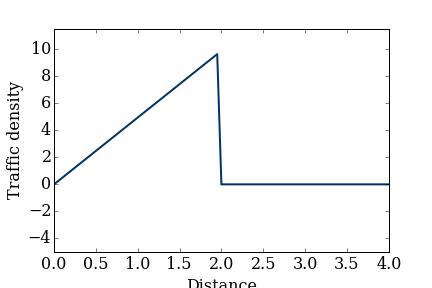
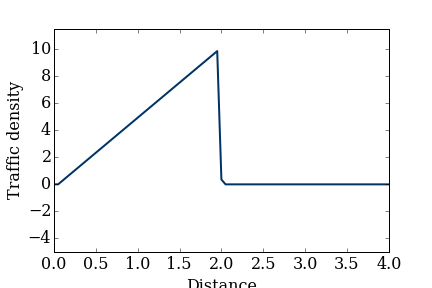
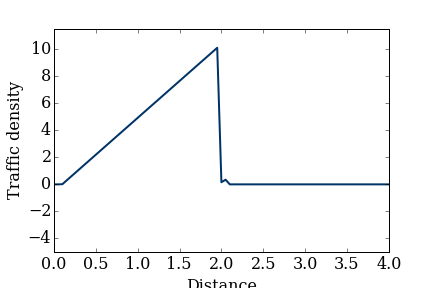
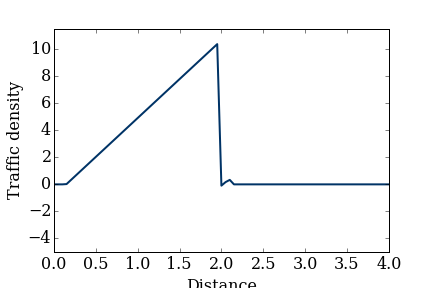
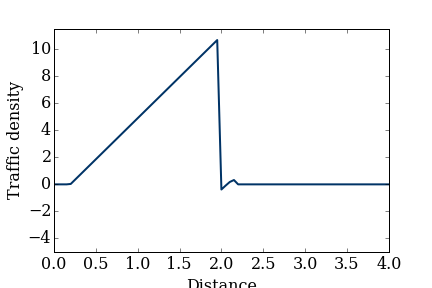
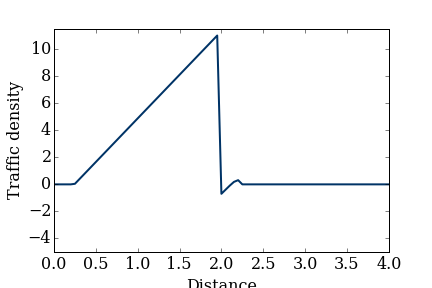
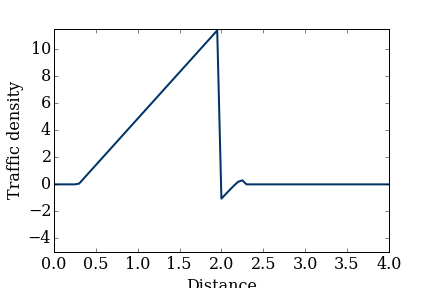
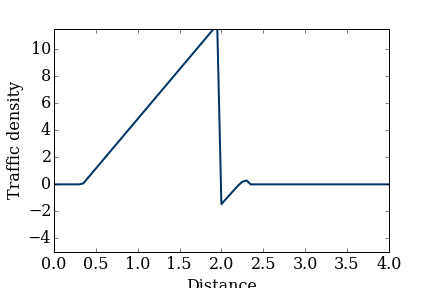
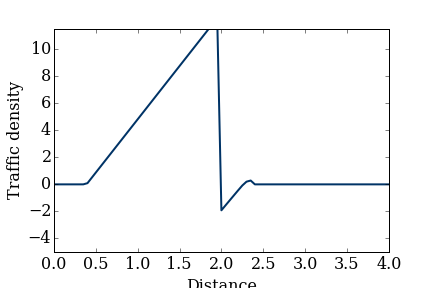
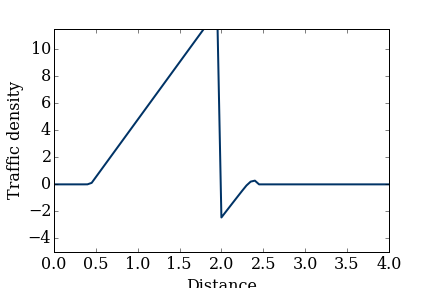
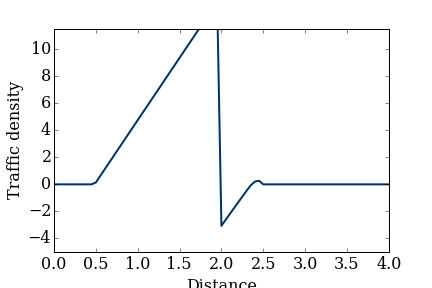
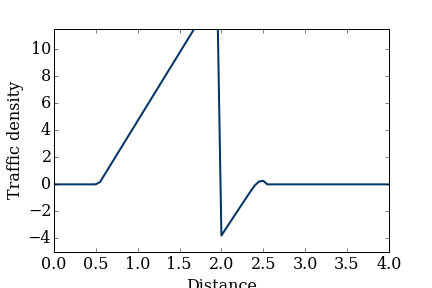
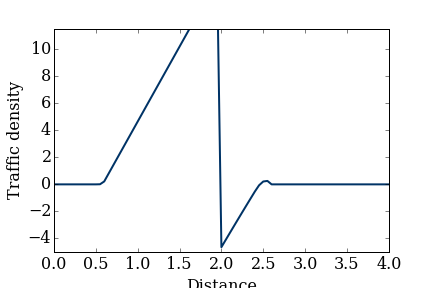
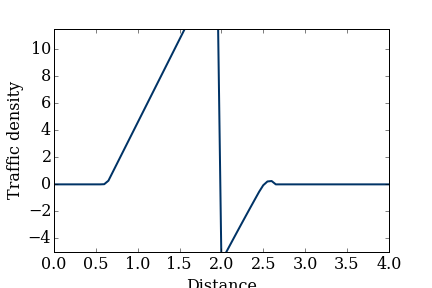
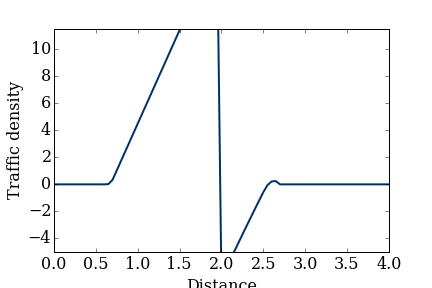
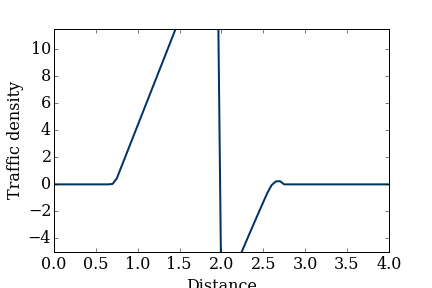
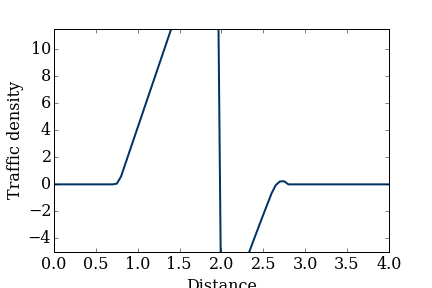
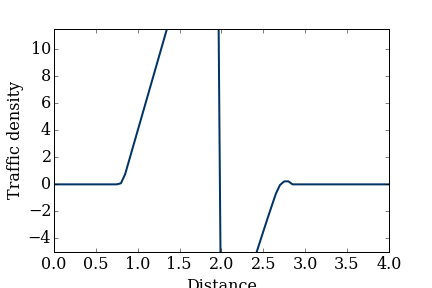
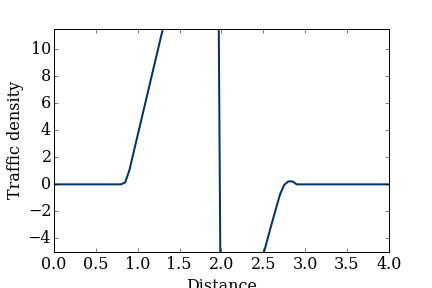
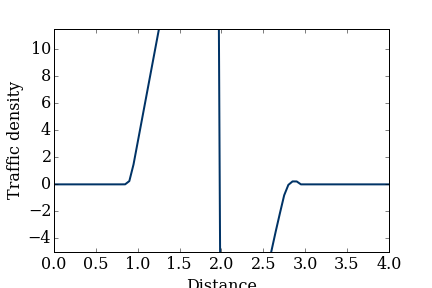
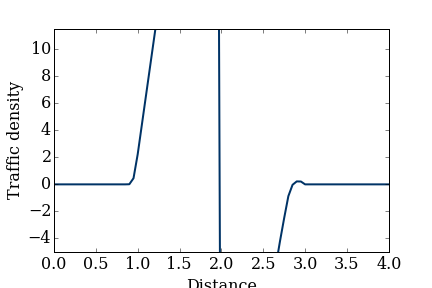
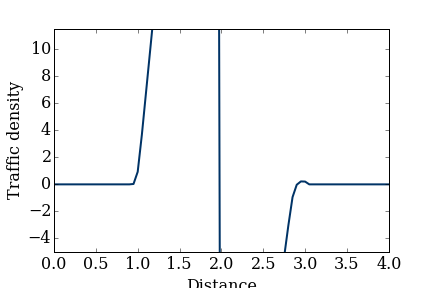
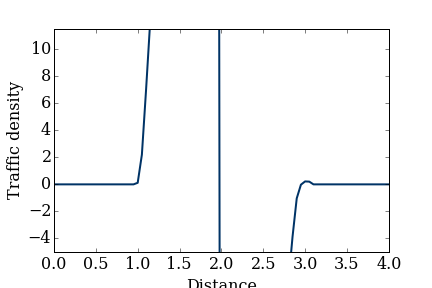
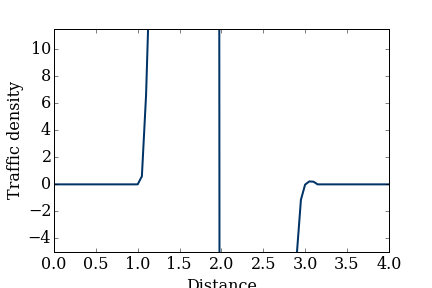
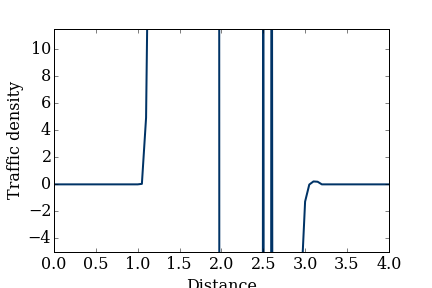
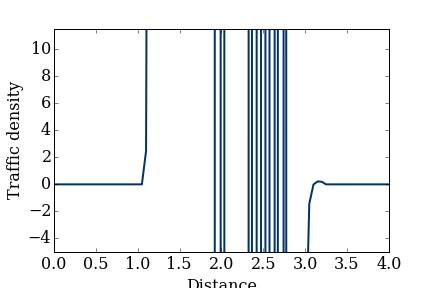
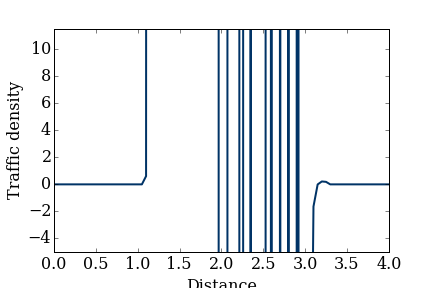
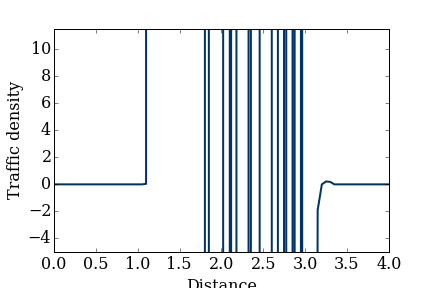
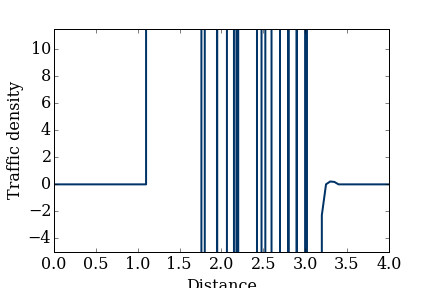
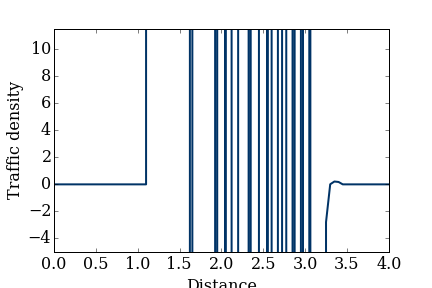

In [13]:
fig = pyplot.figure();
ax = pyplot.axes(xlim = (0,4), ylim=(-5,11.5), xlabel=('Distance'), ylabel=('Traffic density'));
line, = ax.plot([],[], color='#003366', lw = 2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames = rho_n, interval=50)
display_animation(anim, default_mode='once')


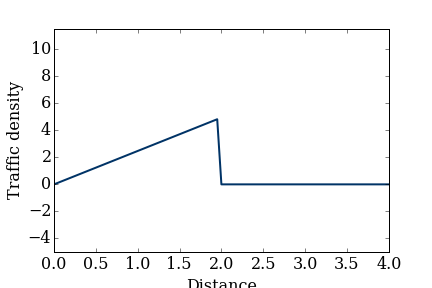
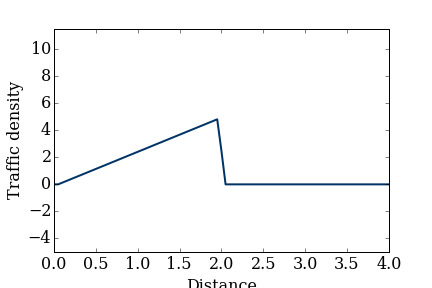
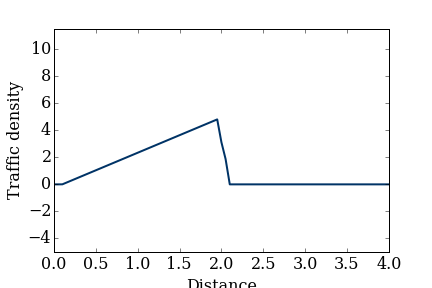
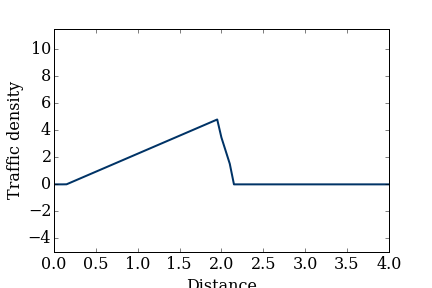
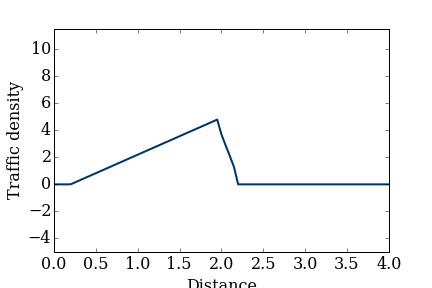
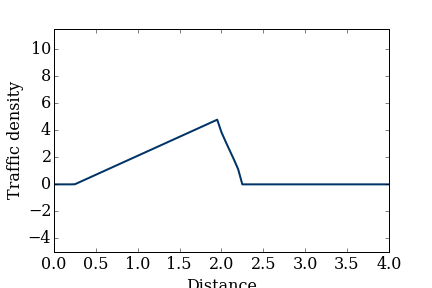
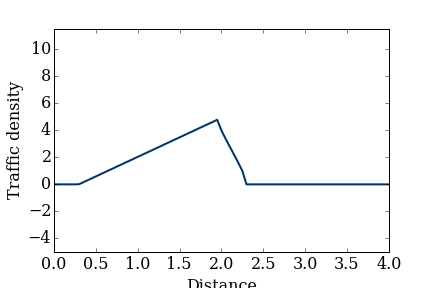
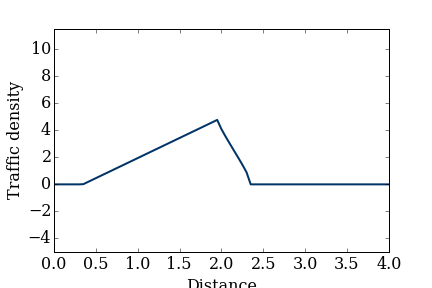
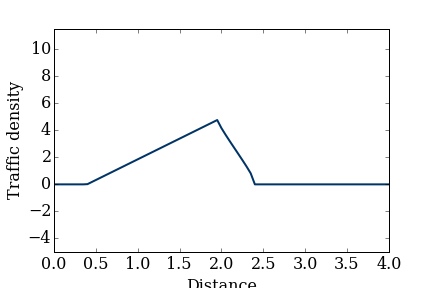
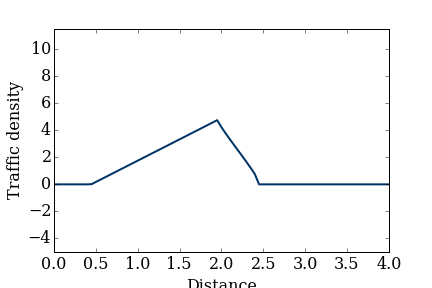
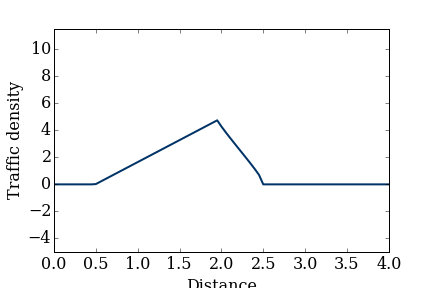
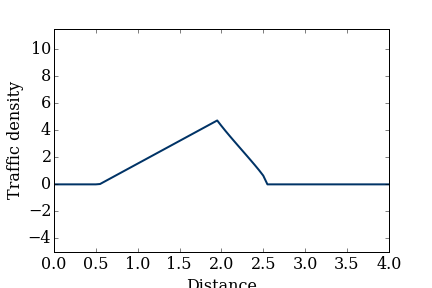
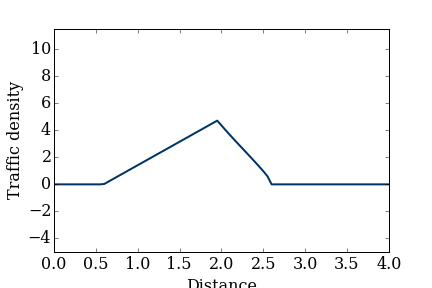
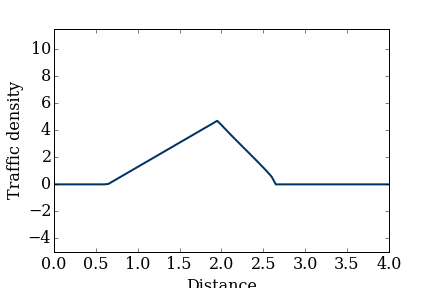
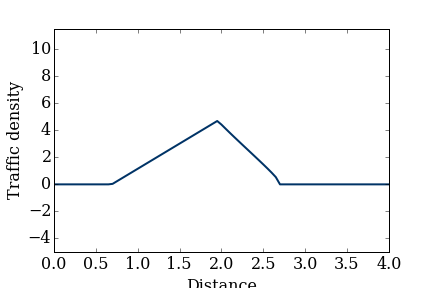
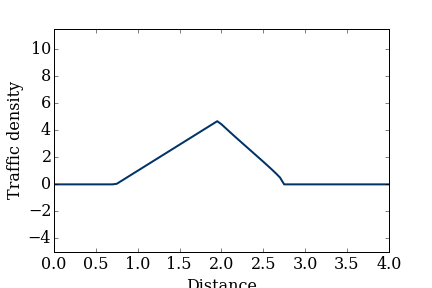
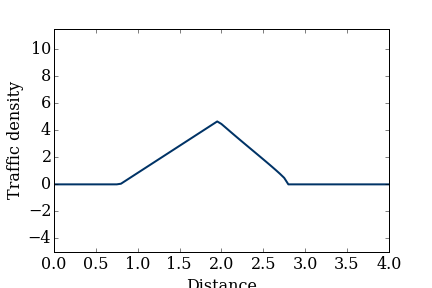
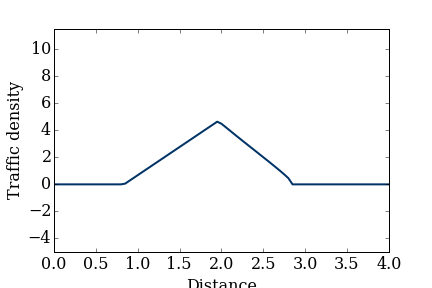
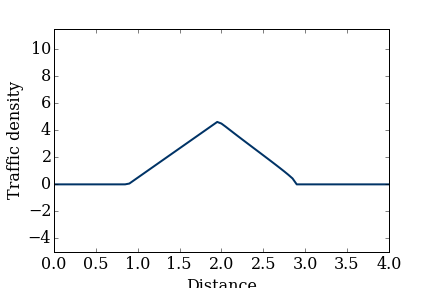
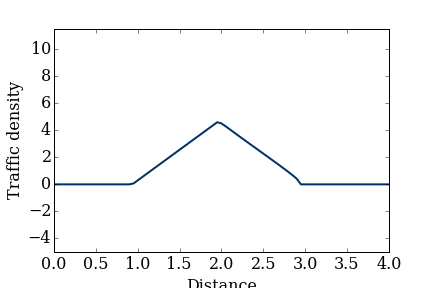
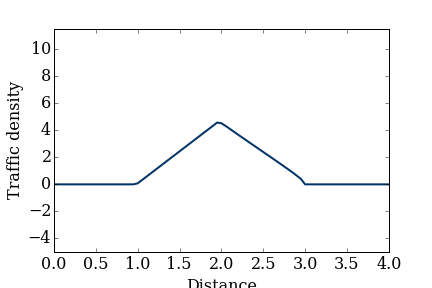
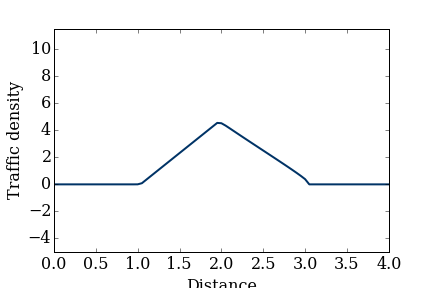
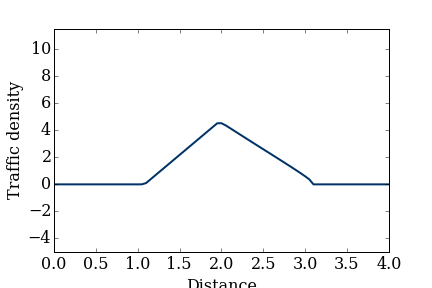
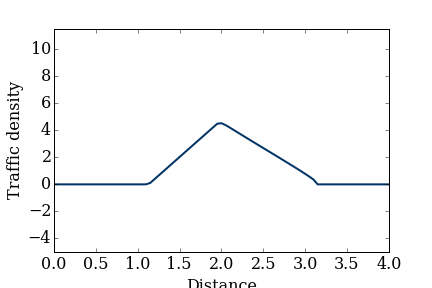
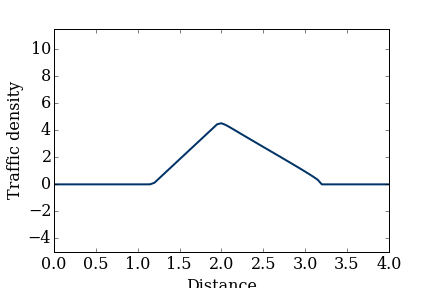
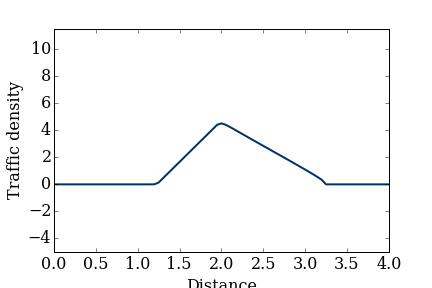
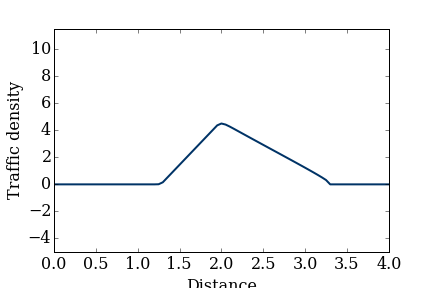
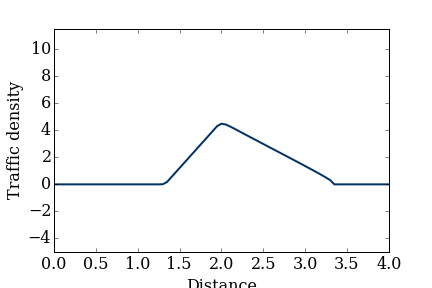
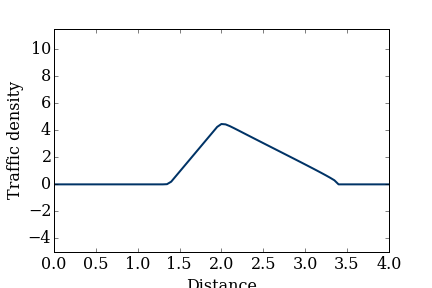
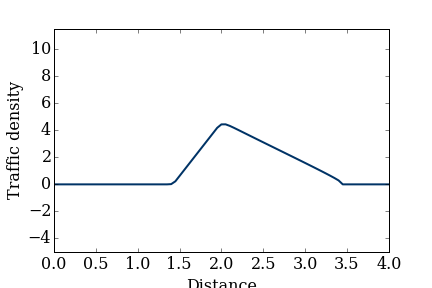
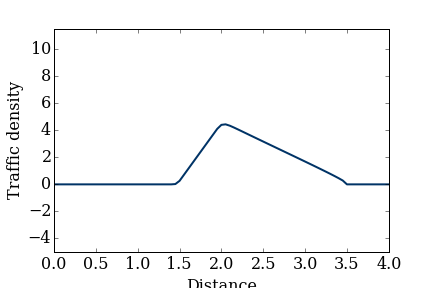
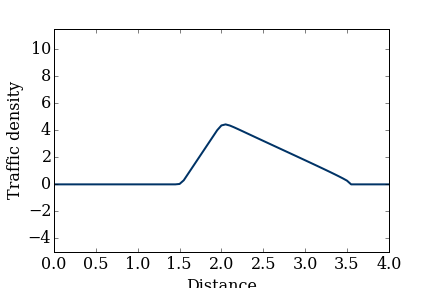
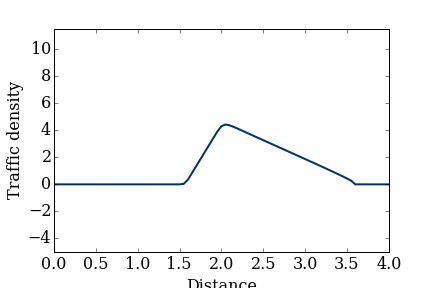
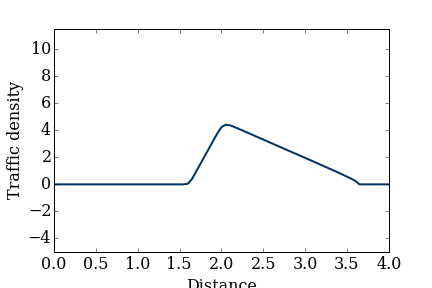
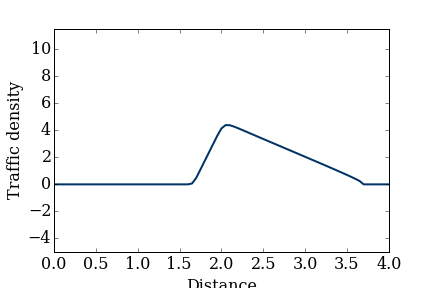
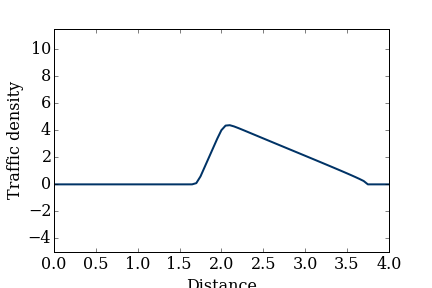
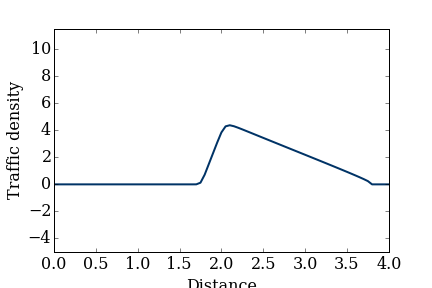
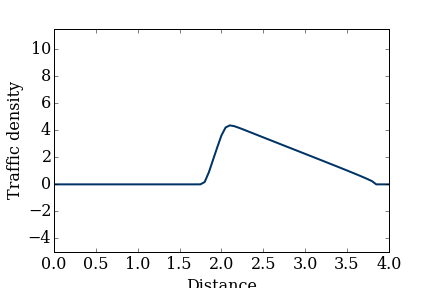
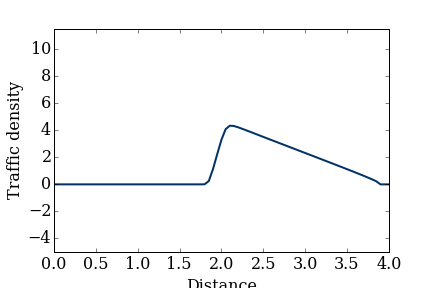
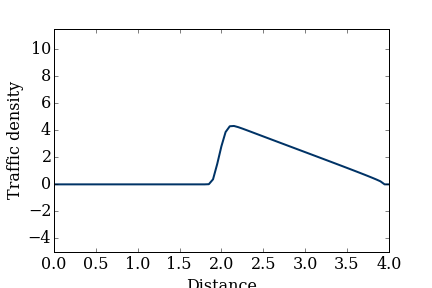

In [14]:
rho_light = 5.
nt = 40
rho = rho_green_light(nx, rho_light)
rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
display_animation(anim, default_mode='once')


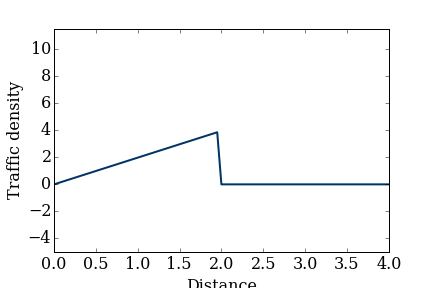
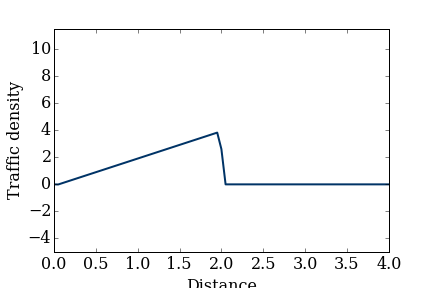
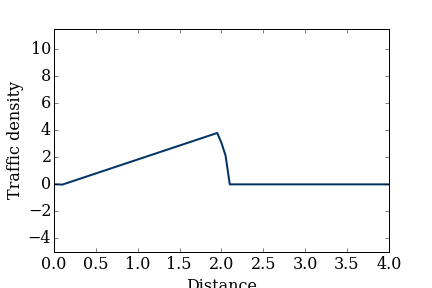
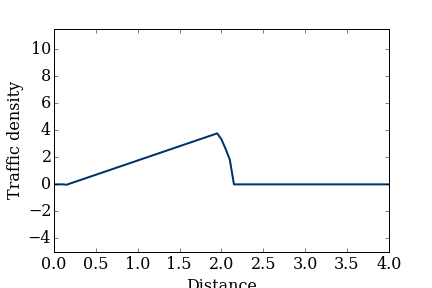
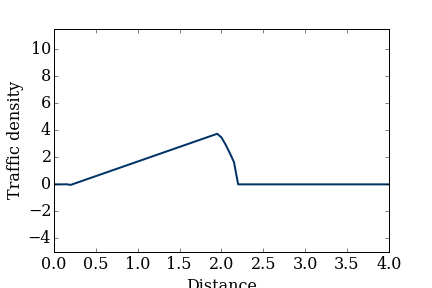
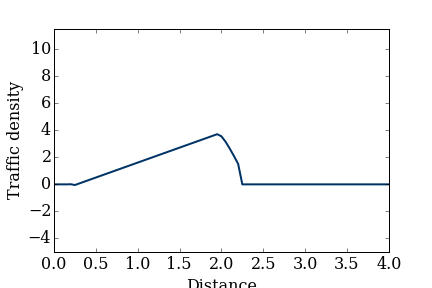
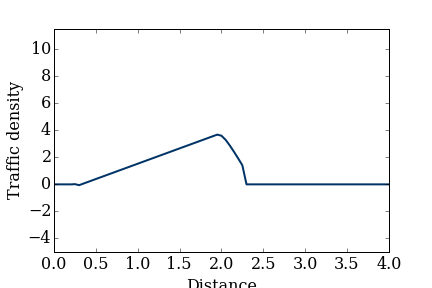
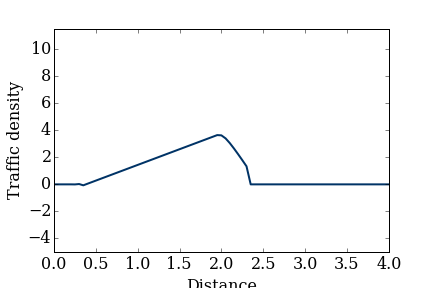
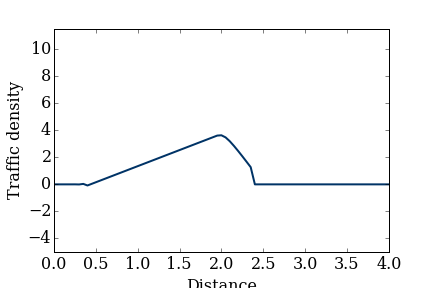
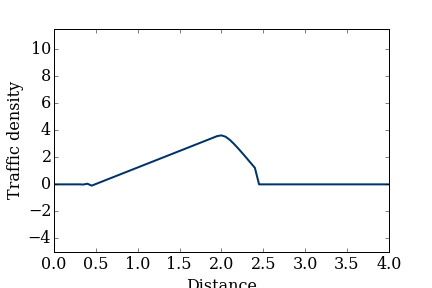
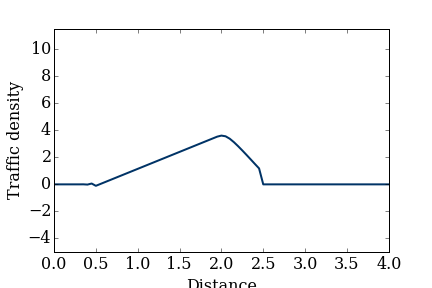
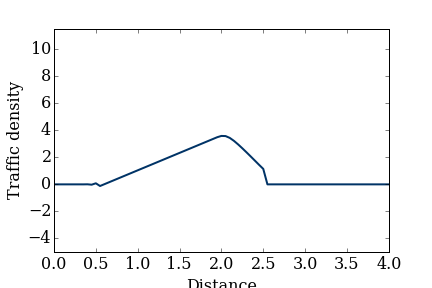
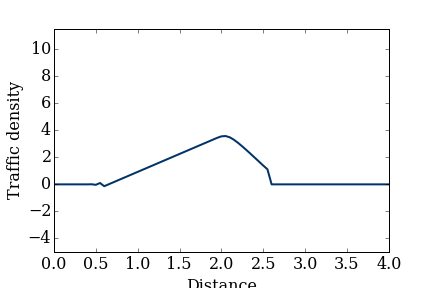
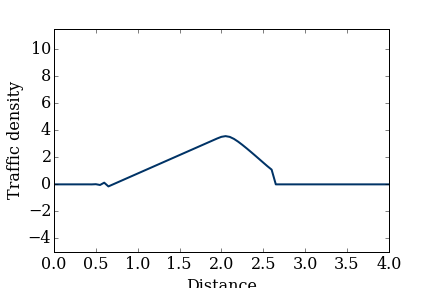
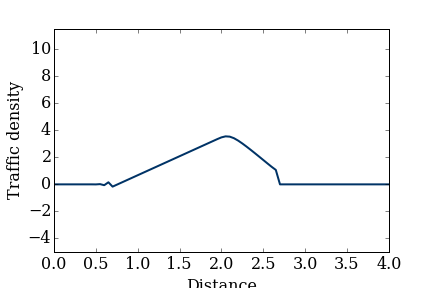
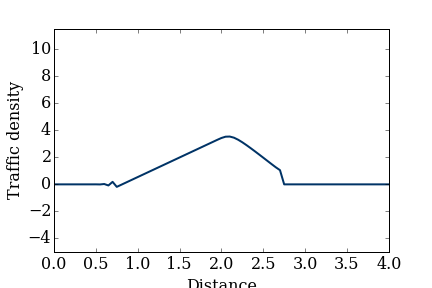
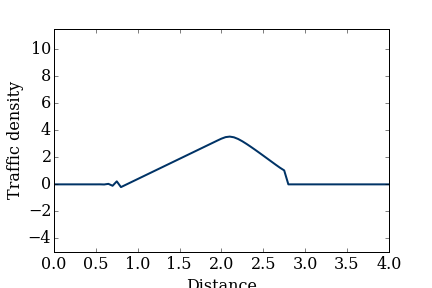
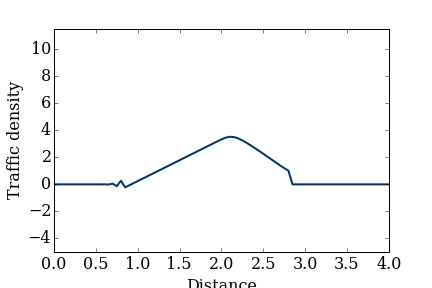
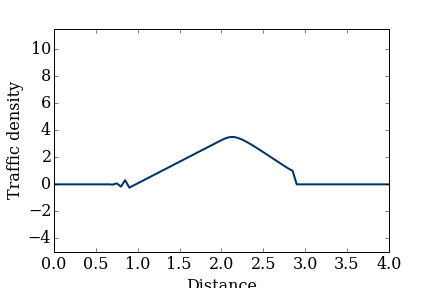
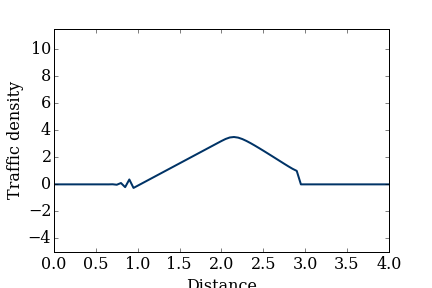
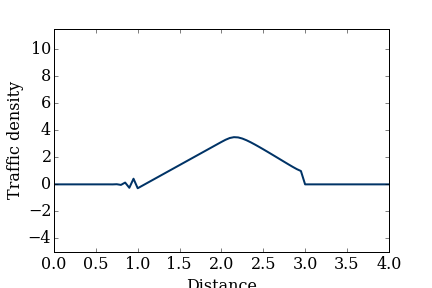
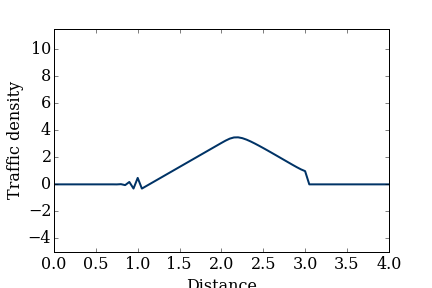
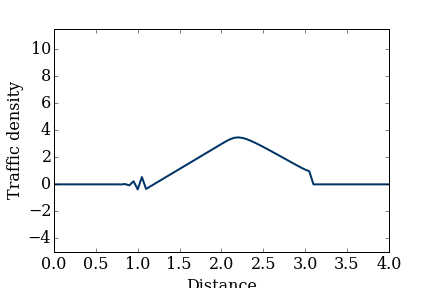
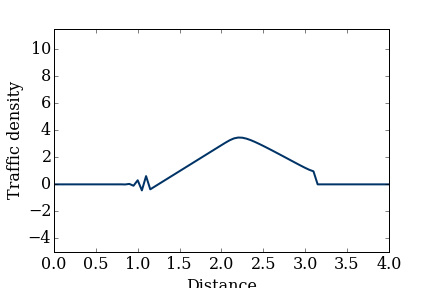
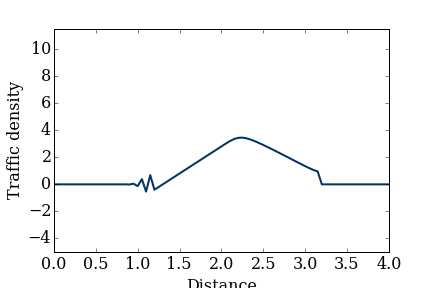
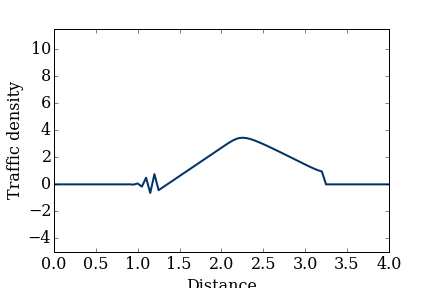
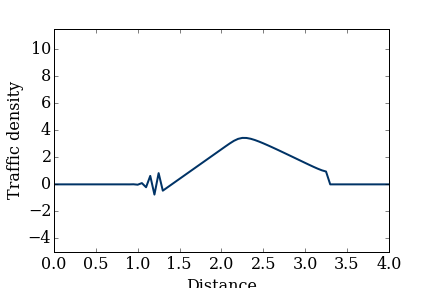
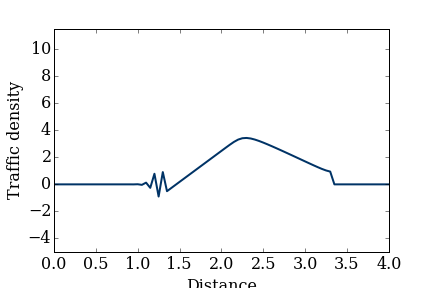
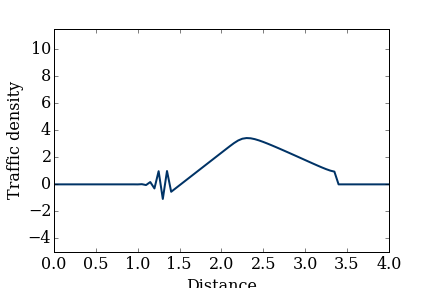
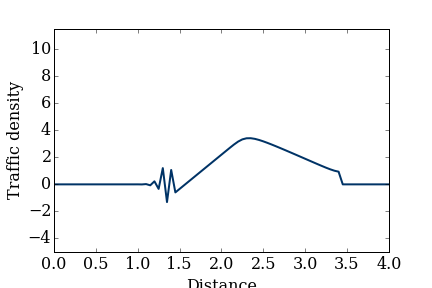
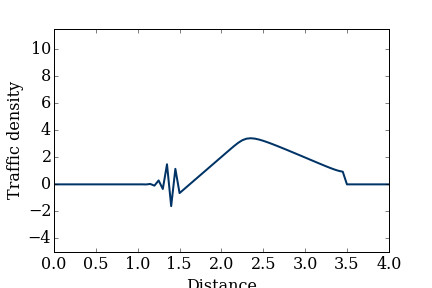
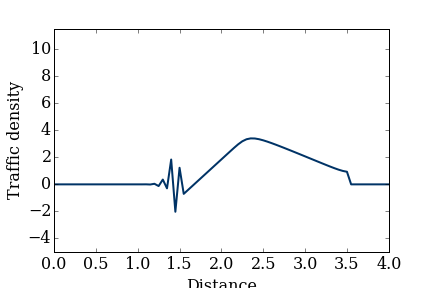
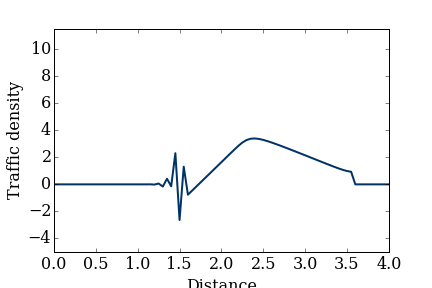
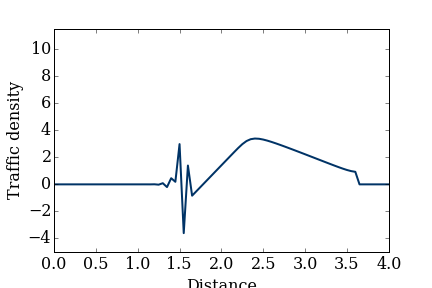
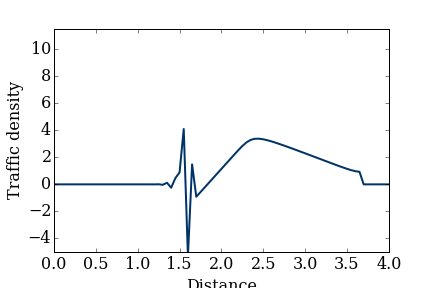
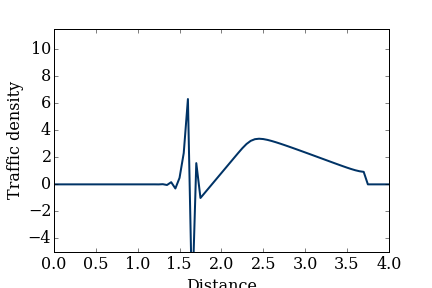
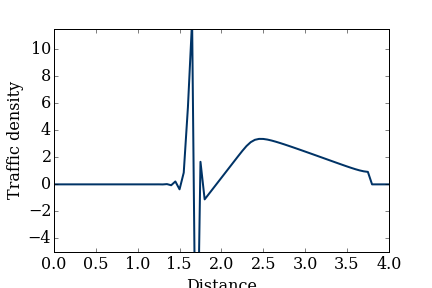
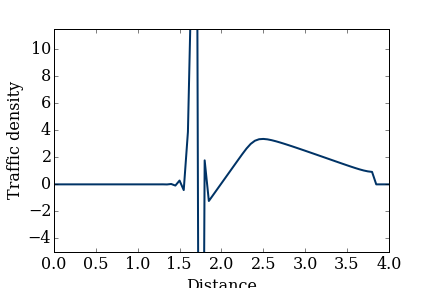
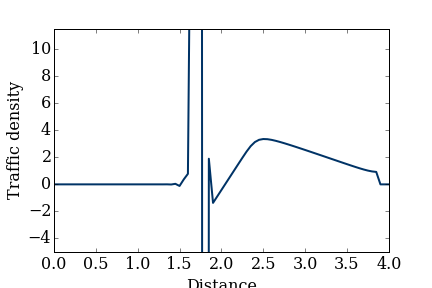
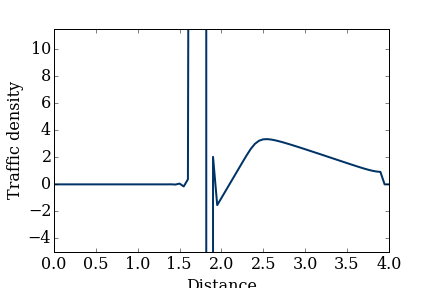

In [15]:
rho_light = 4.
u_max = 1.1
nt = 40
rho = rho_green_light(nx, rho_light)
rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

anim = animation.FuncAnimation(fig, animate, frames = rho_n, interval = 50)
display_animation(anim, default_mode = 'once')